### 將資料以指定格式讀入

In [19]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff("./hypothyroid_modified_cjlin.arff")
data = pd.DataFrame(data[0])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',8.80,2.7,108.0,1.11,97.0,b'other',b'compensated_hypothyroid'
3394,68.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.00,2.1,124.0,1.08,114.0,b'SVI',b'negative'
3395,74.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',5.10,1.8,112.0,1.07,105.0,b'other',b'negative'
3396,72.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.70,2.0,82.0,0.94,87.0,b'SVI',b'negative'


### 求出個別占比，查看資料分布，以圓餅圖呈現

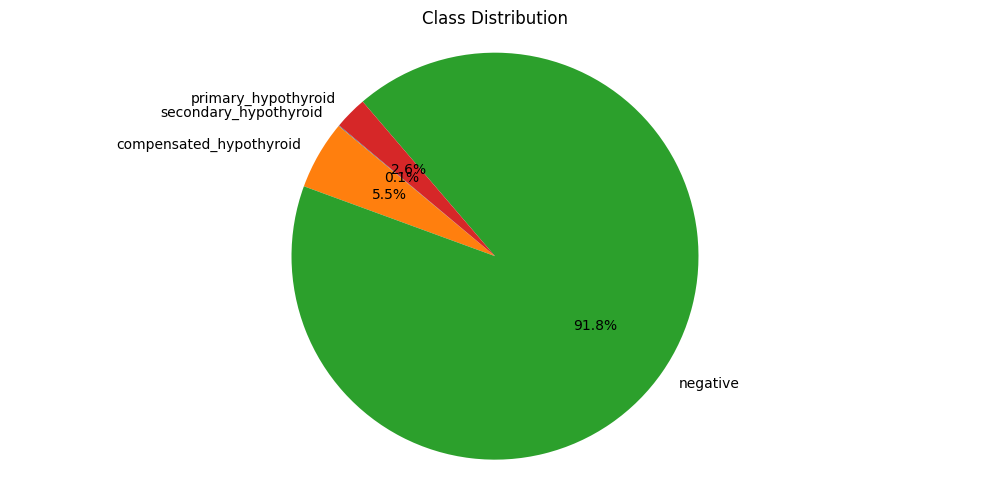

In [20]:
import matplotlib.pyplot as plt
ansType = {cls: 0 for cls in set(data["Class"])}
total = 0
for cls in data["Class"]:
    ansType[cls] += 1
    total += 1
    
# 將字串百分比轉成數值以便畫圖
labels = [key.decode() if isinstance(key, bytes) else str(key) for key in ansType.keys()]
values = [float(val) for val in ansType.values()]

# 畫出圓餅圖
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 為了ML計算，將資料進行one-hot-encoding後，轉換成sklearn可接受的type
* 80% 資料訓練，20% 資料測試 ML
* 亂數種 42 : 《銀河便車指南》裡「生命、宇宙以及萬物的終極答案」

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data)

x = data.iloc[:,0:-4]
y = data.iloc[:,-4:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# 將 one-hot 轉回類別標籤以便 sklearn 相容
y_train_cls = np.argmax(y_train, axis=1)
y_test_cls = np.argmax(y_test, axis=1)

data

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,23.0,4.10,2.0,102.0,1.00,106.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,46.0,0.98,1.7,109.0,0.91,120.0,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
3,70.0,0.16,1.9,175.0,1.00,106.0,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,70.0,0.72,1.2,61.0,0.87,70.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3394,68.0,1.00,2.1,124.0,1.08,114.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3395,74.0,5.10,1.8,112.0,1.07,105.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3396,72.0,0.70,2.0,82.0,0.94,87.0,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


### 10種 ML 進行比較

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "XGB": GradientBoostingClassifier(),
    "ET": ExtraTreesClassifier(),
    "SVM": SVC(),
    "NB": GaussianNB(),
    "MLP": MLPClassifier(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis()
}

results = []

for name, model in models.items():
    pipe = make_pipeline(StandardScaler(), model)
    start = time.time()
    pipe.fit(x_train, y_train_cls)
    end = time.time()

    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred, average='macro')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1": f1,
        "Time": end - start
    })

df_results = pd.DataFrame(results).sort_values("Accuracy", ascending=False)


### 依照正確率、F1(資料平衡?)、模型訓練時間 進行比較

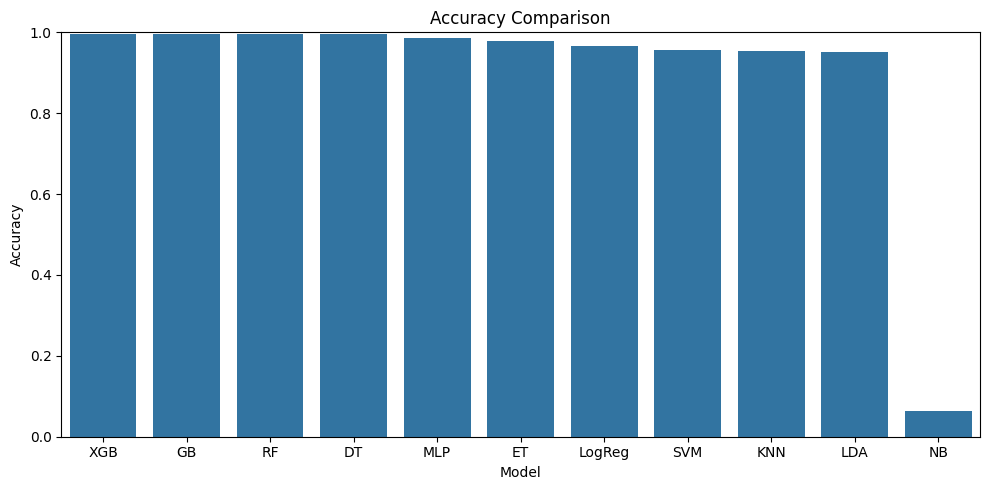

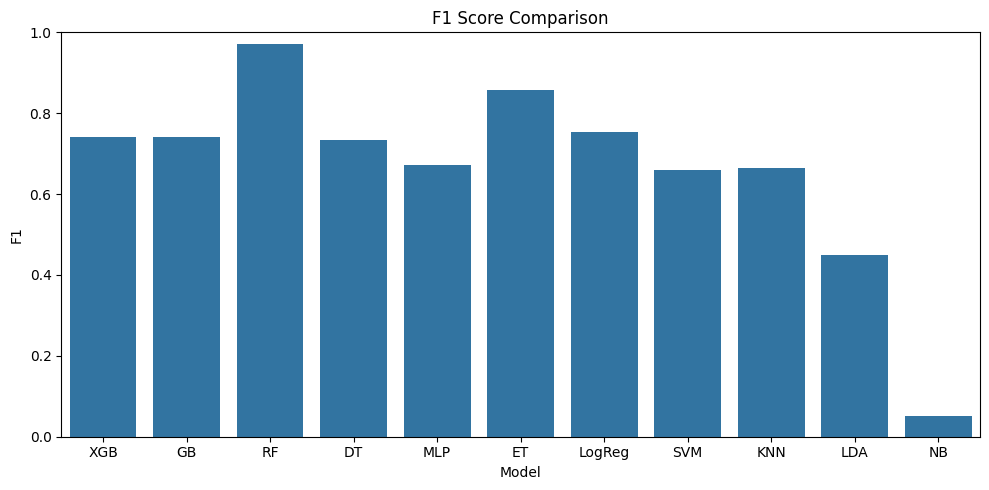

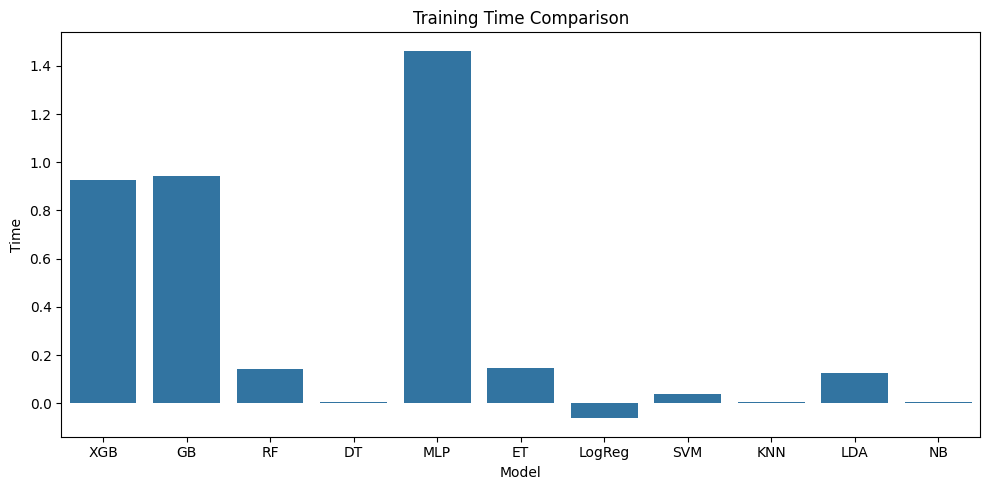

,Model,Accuracy,F1,Time
5,XGB,0.997059,0.741543,0.928287
4,GB,0.997059,0.741543,0.941732
3,RF,0.997059,0.971456,0.140405
2,DT,0.995588,0.732745,0.006877
9,MLP,0.985294,0.672920,1.463021
6,ET,0.977941,0.858570,0.148126
0,LogReg,0.966176,0.752934,-0.062534
7,SVM,0.957353,0.659259,0.040276
1,KNN,0.952941,0.664368,0.004401
10,LDA,0.951471,0.448603,0.126316


In [23]:
# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="F1")
plt.title("F1 Score Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="Time")
plt.title("Training Time Comparison")
plt.tight_layout()
plt.show()

df_results

### 小結
| 應用情境          | 推薦模型                          |
| ------------- | ----------------------------- |
| 穩定、高效且泛用的分類      | **Random Forest**, ExtraTrees |
| 需要擴展至深層關係     | MLP      |
| 對 recall 要求很高 | 高 F1 較合適（RF、MLP）        |
| 測試 / 原型階段     | Logistic Regression, KNN      |
| 不適用這類資料       | Naive Bayes                   |
